In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled.shape

(2035, 1)

In [6]:
x_train = []
y_train = []
for i in range(60,2035):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [7]:
#load data test
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [8]:
dataset_test


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


## Building the LSTM

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1975/1975 [==============================] - 43s 22ms/step - loss: 0.0091
Epoch 2/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0017
Epoch 3/100
1975/1975 [==============================] - 30s 15ms/step - loss: 0.0016
Epoch 4/100
1975/1975 [==============================] - 33s 16ms/step - loss: 0.0015
Epoch 5/100
1975/1975 [==============================] - 31s 16ms/step - loss: 0.0013
Epoch 6/100
1975/1975 [==============================] - 30s 15ms/step - loss: 0.0014
Epoch 7/100
1975/1975 [==============================] - 31s 16ms/step - loss: 0.0011
Epoch 8/100
1975/1975 [==============================] - 30s 15ms/step - loss: 0.0012
Epoch 9/100
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0010
Epoch 10/100
1975/1975 [==============================] - 31s 16ms/step - loss: 9.5582e-04
Epoch 11/100
1975/1975 [===========

1975/1975 [==============================] - 29s 15ms/step - loss: 2.0955e-04
Epoch 76/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.1642e-04
Epoch 77/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.3057e-04
Epoch 78/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.2478e-04
Epoch 79/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.2039e-04
Epoch 80/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.3951e-04
Epoch 81/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.5107e-04
Epoch 82/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.4616e-04
Epoch 83/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.4974e-04
Epoch 84/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.1836e-04
Epoch 85/100
1975/1975 [==============================] - 29s 15ms/step - loss: 2.2232e-04
Epoch 86/100

## Predicting Future Stock

In [11]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,76):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


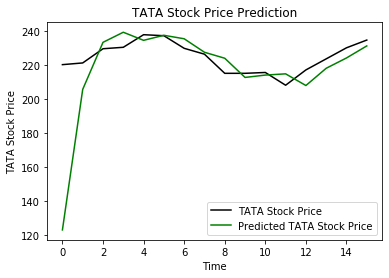

In [12]:
plt.plot(real_stock_price,color='black',label='TATA Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()